In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from pydataset import data
from env import get_db_url

# Exercises

*For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.*

# Has the network latency gone up since we switched internet service providers?

H0 : No, network latency has not changed, or it has decreased since we switched internet service providers


Ha: Yes, network latency has change since we've switched internet service providers.

True Positive : I formulate that the network latency has increased since we switched internet services due to my hypothesis , and this is most evidently true. 

True Negative : All hypothesis lead to the conclusion that the current latency has not increased, has decreasaed, or is the same as the internet service providers previous. 

Type I Error: I reject the null hypothesis by concluding that there is an increase in latency since we've switched internet service providers, when the latency has not increased. 

Type II Error: I fail to reject the null hypothesis as I conclude that there is not an increase in network latency since we switched internet service providers. The latency is the same or worse. When actually, it has increased. 

# Is the website redesign any good?

potential testable outcomes :
 - website traffic/users
     - number of clicks
     - number of active users on the website 

H0 : Since the website redesign there has not been a increase number of clicks, users, or overall website traffic. 

Ha:  The website redesign has increased website traffic in comparison to the previous website design, with increased number of clicks and/or number of active users.

or as simple as: 

*There has been an increase in daily website visits since deploying the redesigned website*

True Positive (Alternative Hypothesis is True) : The website redesign has shown strong correlation to increase in number of clicks or overall website traffic, at any time on any day. 

True Negative : The website redesign has shown no correlation to increase in number of clicks or overall website traffic, at any time on any day. 

Type I Error : I determine that the website redesign has increased website traffic when it actually has decreased or stayed the same.

Type II Error : I determine that the website traffic hasn't changed or has decreased when it actually has increased.

 # Is our television ad driving more sales?

Potential testing outcomes:
 - num of views
 - customers
     - agg. : num of customers corr. w/ num of views since tv ad

H0 : Sales volume is not greater with the new ad

Ha: Sales volume is greater with the new ad

 - True positive : I determine that the sales volume has increased and it has.

 - True Negative : I determine that the sales volume has stayed the same or decreased and it has.

 - Type 1 Error : I determine that the sales volume has increased when it has actually decreased ir stayed the same.

 - Type 2 Error : I determine that the sales volume has decreased or stayed the same when it has actually increased. 

*Note : within your null and alternative hypothesis you MUST capture all possible outcomes*

# T-Test Exercises

# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
- A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days.
- A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
- Use a .05 level of significance.

In [2]:
alpha = 0.05
office_1 = stats.norm(90, 15).rvs(10_000)
office_2 = stats.norm(100, 20).rvs(10_000)

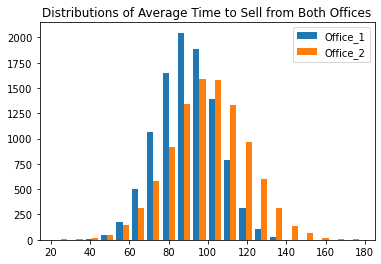

In [3]:
plt.title('Distributions of Average Time to Sell from Both Offices')
plt.hist([office_1, office_2], bins= 20, label=['Office_1', "Office_2"])
plt.legend(loc="upper right")
plt.show()

In [4]:
t,p = stats.ttest_ind(office_1, office_2)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


# Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [5]:
df = data("mpg")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [6]:
hwy99 = df[df['year']== 1999].hwy
hwy08 = df[df['year']== 2008].hwy

t, p = stats.ttest_ind(hwy99, hwy08)

if p< alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


In [7]:
cty99 = df[df["year"] == 1999].cty
cty08 = df[df["year"] == 2008].cty

t, p = stats.ttest_ind(cty99, cty08)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")  

We fail to reject the null hypothesis


In [8]:
df["avg_fuel_efficiency"] = (df.hwy + df.cty) / 2
alpha = .05

fe99 = df[df["year"] == 1999].avg_fuel_efficiency
fe08 = df[df["year"] == 2008].avg_fuel_efficiency

t, p = stats.ttest_ind(fe99, fe08)
p

0.8263744040323578

In [9]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")  

We fail to reject the null hypothesis


# Are Average cars more fuel-efficient than the average car?

In [10]:
population = df.hwy
compacts = df[df["class"] == "compact"].hwy

In [11]:
t, p = stats.ttest_1samp(compacts, population.mean())
p

1.9716962312411042e-11

In [12]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")  

We reject the null hypothesis


# Do manual cars get better gas mileage than automatic cars?

In [13]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [14]:
m_hwy = df[df.trans.str.contains("manual")].hwy
a_hwy = df[df.trans.str.contains("auto")].hwy

In [15]:
t, p = stats.ttest_ind(m_hwy, a_hwy)
p

1.888044765552951e-05

In [16]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")  

We reject the null hypothesis


# Correlation Exercises

# 1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [17]:
sql = """select * from customers
join internet_service_types using(internet_service_type_id)"""

pd.options.display.max_columns = None

In [18]:
url = get_db_url("telco_churn")
telco = pd.read_sql(sql, url)
telco.head()

,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type
0,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No,DSL
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,1,No,2,59.9,542.4,No,DSL
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes,Fiber optic
3,2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes,Fiber optic
4,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes,Fiber optic


In [19]:
telco[['tenure', 'monthly_charges', 'total_charges']].dtypes

tenure               int64
monthly_charges    float64
total_charges       object
dtype: object

In [20]:
# check the total charges columns 
telco.total_charges.value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64

In [21]:
# check for nulls/empty strings
telco.total_charges = telco.total_charges.str.strip()
telco[telco.total_charges == ""]

# 11 rows have nulls_empty strings

,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type
945,1,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,Yes,Yes,Yes,Yes,Yes,No,3,No,4,56.05,,No,DSL
1731,3,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,No,2,20.00,,No,None
1906,1,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,Yes,Yes,No,Yes,No,No,3,Yes,3,61.90,,No,DSL
2025,3,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,2,Yes,2,19.70,,No,None
2176,3,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,No,2,20.25,,No,None
2250,3,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,No,2,25.35,,No,None
2855,1,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,No,Yes,Yes,Yes,Yes,No,3,No,2,73.35,,No,DSL
3052,3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,No,2,25.75,,No,None
3118,1,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,Yes,No,Yes,Yes,Yes,No,3,Yes,3,52.55,,No,DSL
4054,1,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,No,Yes,Yes,3,No,2,80.85,,No,DSL


In [22]:
# rm those 11 rows
# amazing way to drop from stack overflow: 
telco = telco[telco.total_charges != ""]

telco.total_charges = telco.total_charges.astype('float')

# Relationship of Tenure to M/C

## H0: there is no linear relationship between the two variables

In [23]:
alpha = 0.05
r, p = stats.pearsonr(telco.tenure, telco.monthly_charges)

r, p

# weak positive correlation but the magnitude of the relationship is relatively small

(0.24686176664089532, 3.98982132325287e-98)

In [24]:
alpha = 0.05
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


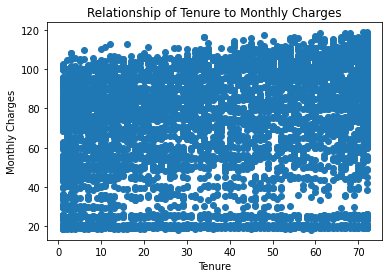

In [25]:
plt.title("Relationship of Tenure to Monthly Charges")
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")

plt.scatter(telco.tenure, telco.monthly_charges)

# Relationship from tenure vs total charges

In [26]:
r, p = stats.pearsonr(telco.tenure, telco.total_charges)
r, p

# strong positive correlations

(0.8258804609332075, 0.0)

In [27]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


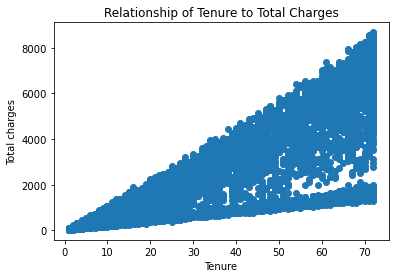

In [28]:
plt.title("Relationship of Tenure to Total Charges")
plt.xlabel("Tenure")
plt.ylabel("Total charges")
plt.scatter(telco.tenure, telco.total_charges)
plt.show()

# - What happens if you control for phone and internet service?

In [29]:
telco.head()

,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type
0,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,2,Yes,2,65.6,593.30,No,DSL
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,1,No,2,59.9,542.40,No,DSL
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes,Fiber optic
3,2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes,Fiber optic
4,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,1,Yes,2,83.9,267.40,Yes,Fiber optic


In [30]:
dsl = telco[telco.internet_service_type == 'DSL']
none = telco[telco.internet_service_type == 'None']
fiber = telco[telco.internet_service_type == 'Fiber optic']

In [31]:
# DSL
r, p = stats.pearsonr(dsl.tenure, dsl.total_charges)
r, p

(0.941184821562981, 0.0)

In [32]:
# Fiber
r, p = stats.pearsonr(fiber.tenure, fiber.total_charges)
r, p

(0.9853093528070622, 0.0)

In [33]:
# DSL
r, p = stats.pearsonr(none.tenure, none.total_charges)
r, p

(0.9814648859044315, 0.0)

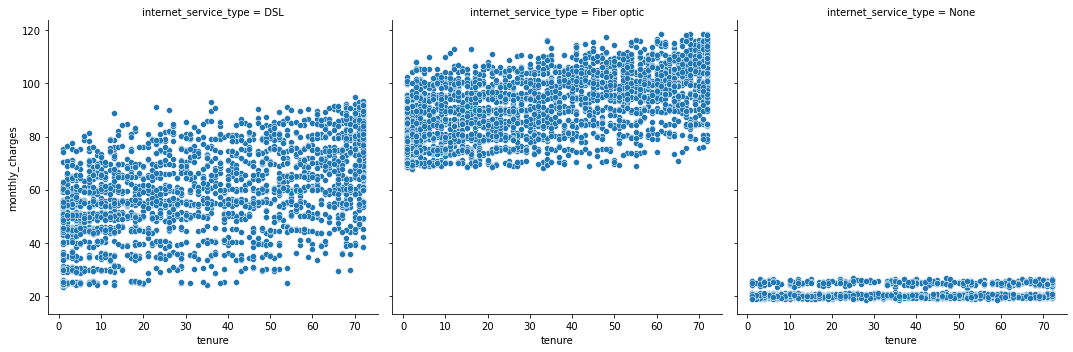

In [34]:
sns.relplot(data = telco , y = 'monthly_charges', 
            x = 'tenure', col = 'internet_service_type')

In [35]:
# stolen from adam review
def corr_tenure_and_total(df):
    return pd.Series(stats.pearsonr(telco.tenure, df.total_charges), index=['r','p'])

In [36]:
stats.pearsonr(telco.tenure, telco.total_charges)

(0.8258804609332075, 0.0)

# 2. Use the employees database.

## - Is there a relationship between how long an employee has been with the company and their salary?




In [37]:
sql = """select emp_no, salary, datediff(NOW(), hire_date) as "days_employed"
from salaries
join employees using(emp_no)
where to_date > NOW()"""

url = get_db_url("employees")
employees = pd.read_sql(sql, url)
employees.head()

,emp_no,salary,days_employed
0,10001,88958,13102
1,10002,72527,13319
2,10003,43311,13039
3,10004,74057,12944
4,10005,94692,11928


In [38]:
r, p = stats.pearsonr(employees.salary, employees.days_employed)
r, p

(0.30646256131860894, 0.0)

In [39]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


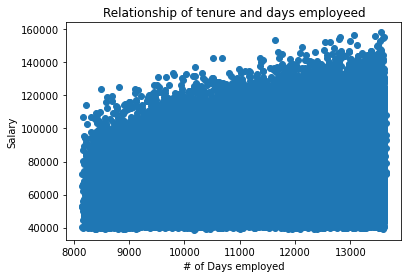

In [40]:
plt.title("Relationship of tenure and days employeed")
plt.xlabel("# of Days employed")
plt.ylabel("Salary")
plt.scatter(employees.days_employed, employees.salary)

## - Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [41]:
sql = """
SELECT count(title) AS titles, datediff((SELECT MAX(hire_date) FROM employees),
e.hire_date) AS employee_tenure
FROM employees AS e
JOIN titles USING(emp_no)
GROUP BY emp_no;
b"""

titles = pd.read_sql(sql, url)
titles.head()

,titles,employee_tenure
0,1,4964
1,1,5181
2,1,4901
3,2,4806
4,2,3790


In [43]:
corr, p = stats.pearsonr(titles.employee_tenure, titles.titles)
corr, p

(0.2665989299136427, 0.0)

In [44]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


<AxesSubplot:xlabel='titles', ylabel='employee_tenure'>

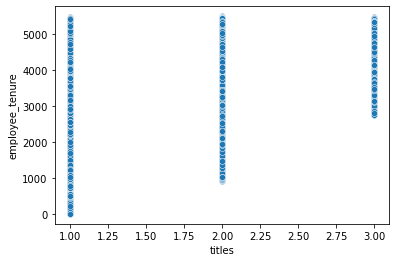

In [45]:
sns.scatterplot(data = titles, x = 'titles', y = 'employee_tenure')

3. Use the sleepstudy data. Is there a relationship between days and reaction time?

- H0 = There is no linear relationship between titles and employee tenure
- Ha = There is a linear relationship between titles and employee tenure

In [46]:
from pydataset import data
sleepstudy = data('sleepstudy')
sleepstudy

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [47]:
# Days vs Reaction Time

In [48]:
r, p = stats.pearsonr(sleepstudy.Days, sleepstudy.Reaction)
r, p

(0.5352302262650253, 9.894096322214812e-15)

In [49]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

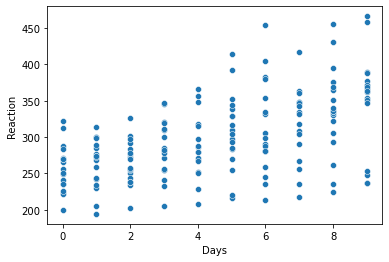

In [50]:
sns.scatterplot(data = sleepstudy, x='Days', y='Reaction')